# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

c:\Users\ruoxi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

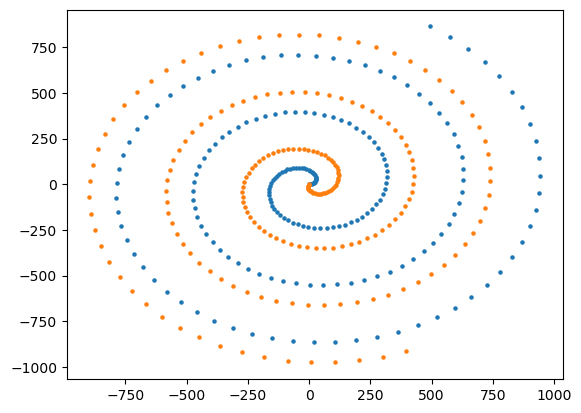

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = pd.concat([df1, df2], ignore_index=True)
df['CLASS'].value_counts()

CLASS
0    200
1    200
Name: count, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [5]:
# your code here

!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
# Perform the feature engineering on X and Y
import numpy as np

df['sin_X'] = np.sin(df['X'])
df['sin_Y'] = np.sin(df['Y'])
df['XY'] = df['X']*df['Y']
df['X2'] = df['X']*df['X']
df['Y2'] = df['Y']*df['Y']

In [7]:
df.head()

,X,Y,CLASS,sin_X,sin_Y,XY,X2,Y2
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.975021,0.499167,0,-0.965710,0.478694,2.483367,24.750832,0.249168
2,9.800666,1.986693,0,-0.367099,0.914754,19.470917,96.053050,3.946950
3,14.330047,4.432803,0,0.981456,-0.961170,63.522278,205.350257,19.649743
4,18.421220,7.788367,0,-0.415358,0.997848,143.471218,339.341342,60.658658


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['X', 'Y', 'sin_X', 'sin_Y', 'XY', 'X2', 'Y2']], df['CLASS'], test_size=0.2, random_state=10)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [10]:
X_train_scaled.shape

(320, 7)

In [11]:
import tensorflow as tf

# Create an instance of the Adam optimizer with the default learning rate
adam_optimizer = tf.keras.optimizers.Adam()

# Manually set the learning rate
new_learning_rate = 0.1
adam_optimizer.learning_rate.assign(new_learning_rate)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.1>

In [12]:
from tensorflow.keras import regularizers

In [16]:
# Define the model with L1 regularization in the Dense layers
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l1(0.01)),
    Dense(10, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dense(10, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

# Fit the model
model.fit(X_train_scaled, y_train, epochs=300, batch_size=40)

Epoch 1/300
8/8 [==============================] - 2s 4ms/step - loss: 1.4507 - accuracy: 0.5437
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 1.4296 - accuracy: 0.5500
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 1.4091 - accuracy: 0.5375
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 1.3888 - accuracy: 0.5437
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 1.3686 - accuracy: 0.5437
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 1.3489 - accuracy: 0.5406
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 1.3293 - accuracy: 0.5406
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 1.3101 - accuracy: 0.5469
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 1.2912 - accuracy: 0.5281
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 1.2724 - accuracy: 0.5375
Epoch 11/300
8/8 [===========

In [17]:
model.evaluate(
  X_test_scaled,
  y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.4875


[0.6936397552490234, 0.48750001192092896]